<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/03-tf-lite-quantizations-ASLMNIST/a3_q1_mnist_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tempfile
import os

import tensorflow as tf
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers, models

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Input dataset

In [2]:
# Load ASL MNIST 
train_pd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/SignLanguageMNIST/sign_mnist_train/sign_mnist_train.csv')
test_pd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/SignLanguageMNIST/sign_mnist_test/sign_mnist_test.csv')
train_labels = train_pd['label'].values
test_labels = test_pd['label'].values
del(train_pd['label'])
del(test_pd['label'])
train_images = train_pd.values
test_images = test_pd.values

In [3]:
test_images.shape, test_labels.shape,train_images.shape,train_labels.shape

((7172, 784), (7172,), (27455, 784), (27455,))

In [4]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [5]:
# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
test_images.shape, test_labels.shape,train_images.shape,train_labels.shape

((7172, 28, 28, 1), (7172,), (27455, 28, 28, 1), (27455,))

In [46]:
# Define the model architecture.
model = models.Sequential([
keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
layers.MaxPool2D(pool_size=(2,2)),
keras.layers.Conv2D(96, kernel_size=(3,3), padding='same', activation='relu',use_bias=False),
layers.MaxPool2D(pool_size=(2,2)),
keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu',use_bias=False),
layers.MaxPool2D(pool_size=(2,2)),
layers.Flatten(),
keras.layers.Dense(512, activation='relu',use_bias=False),
layers.Dropout(0.60),
layers.Dense(25,activation='softmax')
])

In [47]:

# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  train_images,
  train_labels,
  epochs=20,
  batch_size=128,
  validation_data=(test_images,test_labels)
)


Epoch 1/20
215/215 [==============================] - 2s 7ms/step - loss: 3.1043 - accuracy: 0.1755 - val_loss: 2.9757 - val_accuracy: 0.3088
Epoch 2/20
215/215 [==============================] - 1s 6ms/step - loss: 2.7231 - accuracy: 0.5731 - val_loss: 2.6533 - val_accuracy: 0.6454
Epoch 3/20
215/215 [==============================] - 1s 6ms/step - loss: 2.5451 - accuracy: 0.7468 - val_loss: 2.6100 - val_accuracy: 0.6793
Epoch 4/20
215/215 [==============================] - 1s 6ms/step - loss: 2.4614 - accuracy: 0.8291 - val_loss: 2.5039 - val_accuracy: 0.7864
Epoch 5/20
215/215 [==============================] - 1s 6ms/step - loss: 2.4063 - accuracy: 0.8834 - val_loss: 2.4396 - val_accuracy: 0.8491
Epoch 6/20
215/215 [==============================] - 1s 6ms/step - loss: 2.3835 - accuracy: 0.9042 - val_loss: 2.4202 - val_accuracy: 0.8677
Epoch 7/20
215/215 [==============================] - 1s 6ms/step - loss: 2.3759 - accuracy: 0.9112 - val_loss: 2.4176 - val_accuracy: 0.8723
Epoch 

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 96)        55296     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         110592    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

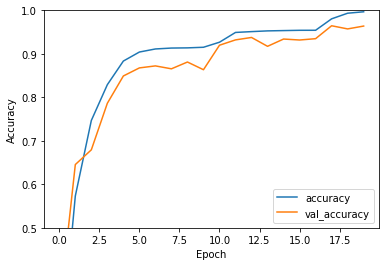

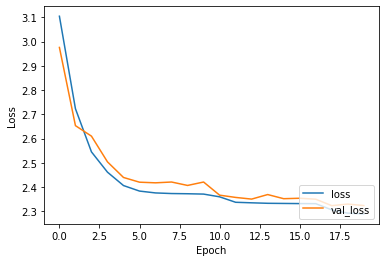

225/225 - 0s - loss: 2.3239 - accuracy: 0.9639


In [49]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
tflite_models_dir = '/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/tflite_models'

# Baseline to TFLite

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tf_lite_model_file = '/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/tflite_models/sign_mnist_model.tflite'

with open(tf_lite_model_file,'wb') as f:
    f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp2n64pzqn/assets


### Baseline TFLite Size(MB)

In [13]:
(os.path.getsize(tf_lite_model_file) / 1024) / 1024

1.4630508422851562

### Baseline TFLite Accuracy

In [14]:
def evaluate_model(interpreter):
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]['index']
    predictions = []

    for img in test_images:
        timg = np.expand_dims(img,axis = 0).astype(np.float32)
        interpreter.set_tensor(input_index,timg)
        
        interpreter.invoke()

        output = interpreter.tensor(output_index)
        pred = np.argmax(output()[0])
        predictions.append(pred)

    predictions = np.array(predictions)
    accuracy= (predictions == test_labels).mean()
    return accuracy    

In [15]:
interpreter= tf.lite.Interpreter(model_path='/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/tflite_models/sign_mnist_model.tflite')
interpreter.allocate_tensors()

In [16]:
tflite_test_acc = evaluate_model(interpreter)

In [17]:
tflite_test_acc

0.8063301728945901

# Baseline to float16 optimization

In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

In [19]:
tflite_fp16_model = converter.convert()
tflite_fp16_file = '/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/tflite_models/sign_mnist_model_quant_f16.tflite'
with open(tflite_fp16_file,'wb') as f:
    f.write(tflite_fp16_model)

INFO:tensorflow:Assets written to: /tmp/tmpvigo2_uy/assets


INFO:tensorflow:Assets written to: /tmp/tmpvigo2_uy/assets


### TFLite float16 optimization size(MB)

In [20]:
(os.path.getsize(tflite_fp16_file) / 1024) / 1024

0.7343902587890625

### TFLite float16 optimization accuracy

In [21]:
interpreter_f16= tf.lite.Interpreter(model_path='/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/tflite_models/sign_mnist_model_quant_f16.tflite')
interpreter_f16.allocate_tensors()

In [22]:
tflite_f16_test_acc = evaluate_model(interpreter_f16)
tflite_f16_test_acc

0.8063301728945901

# Dynamic Range Optimization

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model_quant_dyn = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmptv6b11ym/assets


INFO:tensorflow:Assets written to: /tmp/tmptv6b11ym/assets


In [24]:
tflite_dyn_model = converter.convert()
tflite_dyn_file = '/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/tflite_models/sign_mnist_model_quant_dyn.tflite'
with open(tflite_dyn_file,'wb') as f:
    f.write(tflite_dyn_model)

INFO:tensorflow:Assets written to: /tmp/tmph8_fuiq8/assets


INFO:tensorflow:Assets written to: /tmp/tmph8_fuiq8/assets


## Dynamic Optimization Size

In [25]:
(os.path.getsize(tflite_dyn_file) / 1024) / 1024

0.372100830078125

## Dynamic Optimization Accuracy

In [26]:
interpreter_dyn = tf.lite.Interpreter(model_path='/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/tflite_models/sign_mnist_model_quant_dyn.tflite')
interpreter_dyn.allocate_tensors()

In [27]:
tflite_dyn_test_acc = evaluate_model(interpreter_dyn)
tflite_dyn_test_acc

0.8063301728945901

# Baseline to int8 quantization (weights and activations)


In [28]:
type(train_images),train_images.shape

(numpy.ndarray, (27455, 28, 28, 1))

In [29]:
train_images = train_images.astype(np.float32)

In [30]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(train_images).batch(1).take(100):
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_int8_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpsvzvz8s2/assets


INFO:tensorflow:Assets written to: /tmp/tmpsvzvz8s2/assets


In [31]:
tflite_int8_file = '/content/drive/My Drive/Colab Notebooks/CS581-TestResults/assignment3/q1/tflite_models/sign_mnist_model_quant_int8.tflite'
with open(tflite_int8_file,'wb') as f:
    f.write(tflite_int8_model)

### TFLite to int8 optimization size

In [32]:
(os.path.getsize(tflite_int8_file) / 1024) / 1024

0.376708984375

### TLFITE to int8 optimization accuracy

In [33]:
# Helper function to evaluate a TFLite model on all images
def evaluate_model_int8(tflite_file, model_type):
  global test_images
  global test_labels

  test_image_indices = range(test_images.shape[0])
  predictions = run_tflite_model(tflite_file, test_image_indices)

  accuracy = (np.sum(test_labels== predictions) * 100) / len(test_images)

  print('%s model accuracy is %.4f%% (Number of test samples=%d)' % (
      model_type, accuracy, len(test_images)))

In [34]:
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, test_image_indices):
  global test_images

  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = np.zeros((len(test_image_indices),), dtype=int)
  for i, test_image_index in enumerate(test_image_indices):
    test_image = test_images[test_image_index]
    test_label = test_labels[test_image_index]

    # Check if the input type is quantized, then rescale input data to uint8
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale + input_zero_point

    test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    predictions[i] = output.argmax()

  return predictions


In [35]:
evaluate_model_int8(tflite_int8_file,model_type='Quantized')

Quantized model accuracy is 80.4657% (Number of test samples=7172)


# Quantization Aware Optimization - on the Whole model

In [38]:
! pip install -q tensorflow-model-optimization


     |████████████████████████████████| 174kB 5.4MB/s 


In [50]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
quantize_layer_2 (QuantizeLa (None, 28, 28, 1)         3         
_________________________________________________________________
quant_conv2d_3 (QuantizeWrap (None, 28, 28, 64)        771       
_________________________________________________________________
quant_max_pooling2d_3 (Quant (None, 14, 14, 64)        1         
_________________________________________________________________
quant_conv2d_4 (QuantizeWrap (None, 14, 14, 96)        55491     
_________________________________________________________________
quant_max_pooling2d_4 (Quant (None, 7, 7, 96)          1         
_________________________________________________________________
quant_conv2d_5 (QuantizeWrap (None, 7, 7, 128)         110851    
_________________________________________________________________
quant_max_pooling2d_5 (Quant (None, 3, 3, 128)        

In [51]:
train_images_subset = train_images[0:1000] # out of 60000
train_labels_subset = train_labels[0:1000]

histroy = q_aware_model.fit(train_images_subset, train_labels_subset,
                  batch_size=500, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
2/2 [==============================] - 0s 189ms/step - loss: 2.9365 - accuracy: 0.4580 - val_loss: 2.8208 - val_accuracy: 0.5763
Epoch 2/10
2/2 [==============================] - 0s 94ms/step - loss: 2.8520 - accuracy: 0.5140 - val_loss: 2.7133 - val_accuracy: 0.6670
Epoch 3/10
2/2 [==============================] - 0s 94ms/step - loss: 2.7572 - accuracy: 0.6150 - val_loss: 2.6098 - val_accuracy: 0.7250
Epoch 4/10
2/2 [==============================] - 0s 95ms/step - loss: 2.6496 - accuracy: 0.7300 - val_loss: 2.5291 - val_accuracy: 0.7875
Epoch 5/10
2/2 [==============================] - 0s 93ms/step - loss: 2.5743 - accuracy: 0.7910 - val_loss: 2.4686 - val_accuracy: 0.8503
Epoch 6/10
2/2 [==============================] - 0s 93ms/step - loss: 2.5133 - accuracy: 0.8410 - val_loss: 2.4391 - val_accuracy: 0.8772
Epoch 7/10
2/2 [==============================] - 0s 92ms/step - loss: 2.4579 - accuracy: 0.8980 - val_loss: 2.4195 - val_accuracy: 0.9037
Epoch 8/10
2/2 [==========

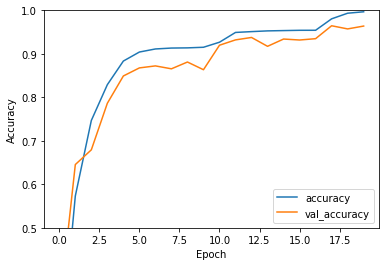

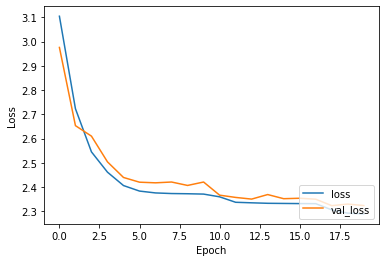

225/225 - 1s - loss: 2.3669 - accuracy: 0.9483


In [52]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = q_aware_model.evaluate(test_images,  test_labels, verbose=2)

In [53]:
_, model = model.evaluate(
    test_images, test_labels, verbose=0)

_, q_aware_model_accuracy = q_aware_model.evaluate(
   test_images, test_labels, verbose=0)

print('Baseline test accuracy:', model)
print('Quant test accuracy:', q_aware_model_accuracy)

Baseline test accuracy: 0.9638873338699341
Quant test accuracy: 0.9482710361480713


## Qunatization Aware Model - to TFLite

In [54]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp1_o94711/assets


INFO:tensorflow:Assets written to: /tmp/tmp1_o94711/assets


In [55]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpnvfqbuoi/assets


INFO:tensorflow:Assets written to: /tmp/tmpnvfqbuoi/assets


In [56]:
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Quant aware TFLite test_accuracy:', test_accuracy)
print('Quant aware TF test accuracy:', q_aware_model_accuracy)

Quant TFLite test_accuracy: 0.9484104852203011
Quant TF test accuracy: 0.9482710361480713
